In [2]:
import sys, os

# make sure the 'code' dir is on your path (change this):
codepath = '/user_data/mmhender/image_stats_gabor/code/'
sys.path.insert(0,codepath)

import numpy as np

from model_fitting import initialize_fitting 
from analyze_fits import analyze_gabor_params
from utils import default_paths
from analyze_features import load_feature_stats

import matplotlib.pyplot as plt
from matplotlib import cm

from plotting import load_fits, plot_utils

In [3]:
# Load everything

models = initialize_fitting.get_prf_models(which_grid=5)
n_prfs = len(models)

which_prf_grid=5;
feature_type='gabor_solo'
# subject=999
subject=998

path_to_load = default_paths.gabor_texture_feat_path
path_to_load = os.path.join(path_to_load, 'feature_stats')

fn1 = os.path.join(path_to_load, 'S%d_%s_mean_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn2 = os.path.join(path_to_load, 'S%d_%s_var_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn3 = os.path.join(path_to_load, 'S%d_%s_covar_grid%d.npy'%(subject, feature_type, which_prf_grid))

mean = np.load(fn1,allow_pickle=True)
var = np.load(fn2,allow_pickle=True)
covar = np.load(fn3,allow_pickle=True)

In [4]:
# Gather information about the gabor feature channels
sf_unique, ori_unique = analyze_gabor_params.get_gabor_feature_info(n_ori=12, n_sf=8)
n_sf = len(sf_unique)
n_ori = len(ori_unique)

mean_reshaped = np.reshape(mean, [n_ori, n_sf, n_prfs], order = 'F')
var_reshaped = np.reshape(var, [n_ori, n_sf, n_prfs], order = 'F')
 

#### Plot mean/variance each feature channel
Averaged across pRFs

0.03906453 0.13671562
0.00013747296 0.0012682885


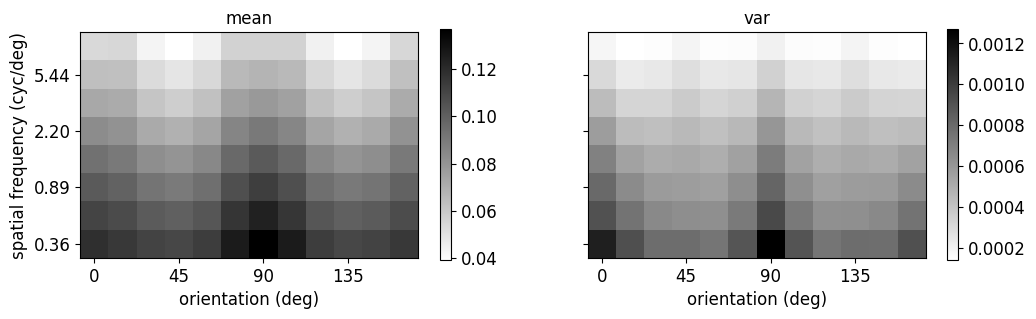

In [11]:
plot_utils.set_all_font_sizes(12)
plt.rcParams['pdf.fonttype']=42

plt.figure(figsize=(12,3));

plt.subplot(1,2,1)

image = np.mean(mean_reshaped, axis=2)
print(np.min(image), np.max(image))
mean_clims = [np.min(image), np.max(image)]
plt.pcolormesh(image.T, vmin=mean_clims[0], vmax=mean_clims[1], cmap=cm.gray_r)
plt.colorbar()
plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
sf_ticks = sf_unique[[0,2,4,6]].round(2)

plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
plt.ylabel('spatial frequency (cyc/deg)')

plt.axis('square')
plt.xlim([0,12])
plt.ylim([0,8])
plt.xlabel('orientation (deg)')
plt.title('mean')

plt.subplot(1,2,2)

image = np.mean(var_reshaped, axis=2)
print(np.min(image), np.max(image))
var_clims = [np.min(image), np.max(image)]
plt.pcolormesh(image.T, vmin=var_clims[0], vmax=var_clims[1], cmap=cm.gray_r)

plt.colorbar()
plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
sf_ticks = sf_unique[[0,2,4,6]].round(2)
plt.yticks(np.array([0,2,4,6])+0.5, [])

plt.axis('square')
plt.xlim([0,12])
plt.ylim([0,8])

plt.xlabel('orientation (deg)')

plt.title('var')
    
fn2save = fn2save = os.path.join(default_paths.fig_path,'meanvar_imagestats.pdf')
plt.savefig(fn2save)

In [12]:
s = models[:,2].round(2)
e = np.sqrt(models[:,0]**2+models[:,1]**2).round(2)

sizes = np.unique(s)
eccens = np.unique(e)

size_ind_max = 4;
ecc_ind_center = 3;
ecc_ind_periph = 6;
center_inds = (s<=sizes[size_ind_max]) & (e<eccens[ecc_ind_center])
periph_inds = (s<=sizes[size_ind_max]) & (e>eccens[ecc_ind_periph])

prf_names = ['central','peripheral']

prf_groups = [center_inds, periph_inds]

# models[center_inds,:].round(2), models[periph_inds,:].round(2)

0.041926347 0.13133195
0.0002077614 0.0014664953
0.035957783 0.14322695
0.0002006537 0.0018858121


Text(0.5, 0.98, 'peripheral - central')

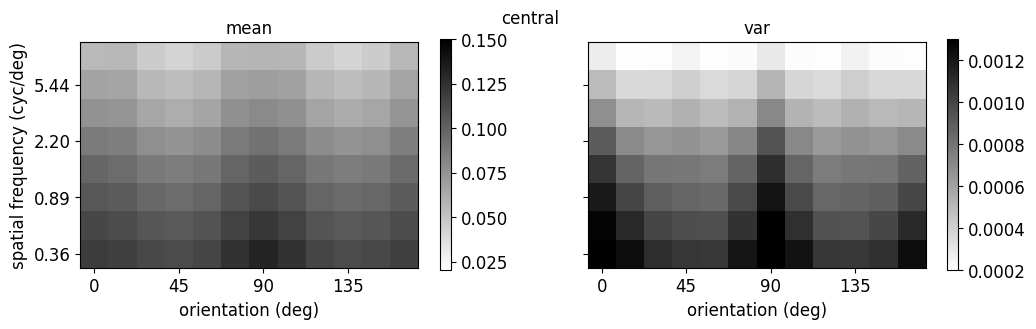

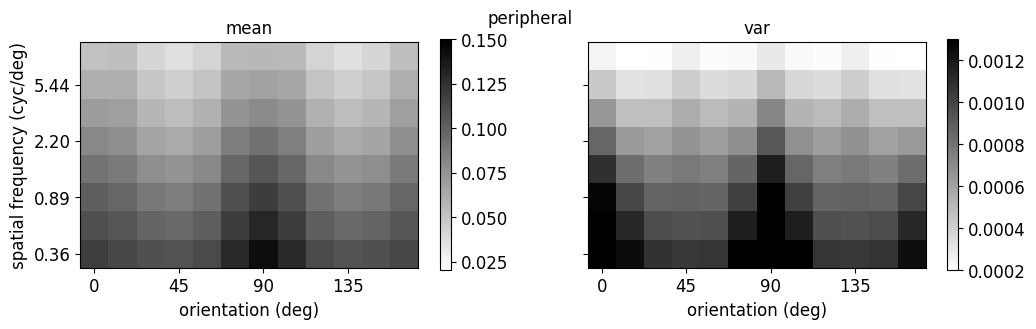

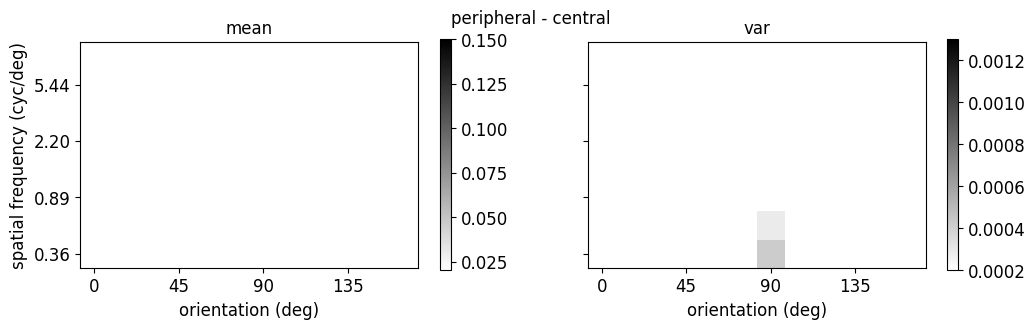

In [13]:
clims_mean = [0.02, 0.15]
clims_var = [0.0002, 0.0013]

for name, prf_inds in zip(prf_names, prf_groups):

    plt.figure(figsize=(12,3));

    plt.subplot(1,2,1)

    image = np.mean(mean_reshaped[:,:,prf_inds], axis=2)
    print(np.min(image), np.max(image))
    # clims = [np.min(image), np.max(image)]
    plt.pcolormesh(image.T, vmin=clims_mean[0], vmax=clims_mean[1], cmap=cm.gray_r)
    plt.colorbar()
    plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
    sf_ticks = sf_unique[[0,2,4,6]].round(2)

    plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
    plt.ylabel('spatial frequency (cyc/deg)')

    plt.axis('square')
    plt.xlim([0,12])
    plt.ylim([0,8])
    plt.xlabel('orientation (deg)')
    plt.title('mean')

    plt.subplot(1,2,2)

    image = np.mean(var_reshaped[:,:,prf_inds], axis=2)
    print(np.min(image), np.max(image))
    # clims = [np.min(image), np.max(image)]
    plt.pcolormesh(image.T, vmin=clims_var[0], vmax=clims_var[1], cmap=cm.gray_r)

    plt.colorbar()
    plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
    sf_ticks = sf_unique[[0,2,4,6]].round(2)
    plt.yticks(np.array([0,2,4,6])+0.5, [])

    plt.axis('square')
    plt.xlim([0,12])
    plt.ylim([0,8])

    plt.xlabel('orientation (deg)')

    plt.title('var')
    
    plt.suptitle(name)

plt.figure(figsize=(12,3));

plt.subplot(1,2,1)

image1 = np.mean(mean_reshaped[:,:,prf_groups[1]], axis=2)
image2 = np.mean(mean_reshaped[:,:,prf_groups[0]], axis=2)
image = image1 - image2

# print(np.min(image), np.max(image))
# clims = [np.min(image), np.max(image)]
plt.pcolormesh(image.T, \
               vmin=clims_mean[0], vmax=clims_mean[1], \
               cmap=cm.gray_r)
plt.colorbar()
plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
sf_ticks = sf_unique[[0,2,4,6]].round(2)

plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
plt.ylabel('spatial frequency (cyc/deg)')

plt.axis('square')
plt.xlim([0,12])
plt.ylim([0,8])
plt.xlabel('orientation (deg)')
plt.title('mean')

plt.subplot(1,2,2)

image1 = np.mean(var_reshaped[:,:,prf_groups[1]], axis=2)
image2 = np.mean(var_reshaped[:,:,prf_groups[0]], axis=2)
image = image1 - image2

# print(np.min(image), np.max(image))
# clims = [np.min(image), np.max(image)]
plt.pcolormesh(image.T, \
               vmin=clims_var[0], vmax=clims_var[1], \
               cmap=cm.gray_r)

plt.colorbar()
plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
sf_ticks = sf_unique[[0,2,4,6]].round(2)
plt.yticks(np.array([0,2,4,6])+0.5, [])

plt.axis('square')
plt.xlim([0,12])
plt.ylim([0,8])

plt.xlabel('orientation (deg)')

plt.title('var')

plt.suptitle('%s - %s'%(prf_names[1], prf_names[0]))